In [1]:
data_path = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"

In [2]:
from Tool_Functions.cleaning_data import * 

from Clustering.new_data_set_all import * 
from Clustering.viualize_datas import * 
from Clustering.new_data_set_all import *

from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
def clean_new_df(data_path):
    df = file_to_dataframe(data_path + 'New_abos.csv')
    df = df.rename( columns= {'DAT_MVT_REELLE' : 'DATE_ACTE_REEL'})
    df['DATE_ACTE_REEL'] = pd.to_datetime(df['DATE_ACTE_REEL'])
    save_to_csv_file(df, data_path + 'new_abos.csv')
    return True
    

In [25]:
clean_new_df(data_path)

True

In [26]:
def upload_new_df(data_path):
    df_original = file_to_dataframe(data_path + "df_Donnees_Reabos_odd_v2.csv")
    dfn = file_to_dataframe(data_path + 'New_abos.csv')
    df_test = join_dataFrames_outer(df_original,dfn, 'ID_ABONNE')
    df_test['DATE_ACTE_REEL_x'].fillna(df_test['DATE_ACTE_REEL_y'], inplace=True)
    df_test.drop(columns=['DATE_ACTE_REEL_y'], inplace=True)
    df_test = df_test.rename( columns= {'DATE_ACTE_REEL_x' : 'DATE_ACTE_REEL'})
    save_to_csv_file(df_test, data_path + 'total_df.csv')
    return True

In [27]:
upload_new_df(data_path)

/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Statapp-CANAL-1/Data_operations/Tool_Functions/join_data.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv(filename,delimiter=st)


True

In [31]:
def upload_new_df_clusters(data_path):
    df_test = file_to_dataframe(data_path + 'total_df.csv')
    df_id = file_to_dataframe(data_path + 'df_id.csv')
    df_merge = pd.merge(df_test, df_id, on='ID_ABONNE', how='left')
    df_merge['Cluster_8'].fillna('unclustered', inplace=True)
    save_to_csv_file(df_merge, data_path + 'total_df_clusters.csv')
    return True

In [32]:
upload_new_df_clusters(data_path)

/var/folders/md/_fklkl9s1z9gj6bpnwj204y40000gn/T/ipykernel_4990/1503170786.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unclustered' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge['Cluster_8'].fillna('unclustered', inplace=True)


True

In [ ]:
df_truncated = file_to_dataframe(data_path + 'df_Données_Reabos_odd_final.csv')
df_original = file_to_dataframe(data_path + "df_Donnees_Reabos_odd_v2.csv")
dfn = file_to_dataframe(data_path + 'New_abos.csv')
df_test = file_to_dataframe(data_path + 'total_df.csv')
df_clusters = file_to_dataframe(data_path + 'df_all_clusters_final.csv')
df_id = file_to_dataframe(data_path + 'df_id.csv')
df_all_clusters = file_to_dataframe(data_path + 'total_df_clusters.csv')

In [4]:
dfn = file_to_dataframe(data_path + 'New_abos.csv')

In [9]:
odd = dfn[dfn['DATE_ACTE_REEL'] >= '2023-11-14']

In [10]:
odd

,DATE_ACTE_REEL,ID_ABONNE
1308,2023-11-30,52923737701
1309,2023-11-28,52962677501
1310,2023-11-30,52974929601
1311,2023-11-30,52949449801
1312,2023-11-30,52960788501
...,...,...
458815,2023-11-24,52941583801
458816,2023-11-28,52058240301
458818,2023-11-25,51943996401
458819,2023-11-23,52221512101


In [13]:
sg = dfn[dfn['DATE_ACTE_REEL'] < '2023-11-14']

In [14]:
sg

,DATE_ACTE_REEL,ID_ABONNE
0,2023-11-01,50950213101
1,2023-11-01,50955287201
2,2023-11-01,50960236001
3,2023-11-01,50977036901
4,2023-11-01,50933674101
...,...,...
458796,2023-11-11,52915440701
458803,2023-11-12,52802399601
458805,2023-11-01,50414368401
458811,2023-11-04,52287139301


In [16]:
pile = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-14']

In [17]:
pile

,DATE_ACTE_REEL,ID_ABONNE
2656,2023-11-14,50815164501
2663,2023-11-14,50416328801
2682,2023-11-14,50417847801
3281,2023-11-14,51710404301
3301,2023-11-14,53043556101
...,...,...
458365,2023-11-14,53178505601
458464,2023-11-14,52128238901
458514,2023-11-14,52079666001
458649,2023-11-14,52841529401


In [19]:
lejouravant = dfn[dfn['DATE_ACTE_REEL'] == '2023-11-13']

In [20]:
df_repartition_promo = count_abo_conditions(dfn,['DATE_ACTE_REEL'],'ID_ABONNE')

In [21]:
df_repartition_promo

,DATE_ACTE_REEL,NB_ID_ABONNE
4,2023-11-05,24696
3,2023-11-04,23067
2,2023-11-03,20284
28,2023-11-29,19745
29,2023-11-30,19462
6,2023-11-07,18490
27,2023-11-28,18229
0,2023-11-01,18177
1,2023-11-02,17581
10,2023-11-11,16752


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


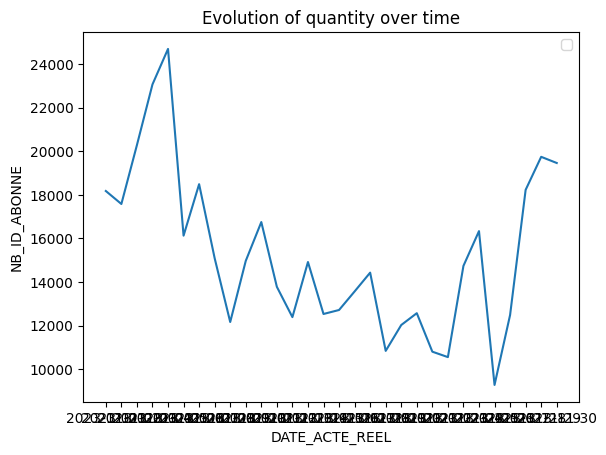

In [24]:
sns.lineplot(x='DATE_ACTE_REEL', y='NB_ID_ABONNE', data=df_repartition_promo.sort_values(by='DATE_ACTE_REEL'))

plt.title('Evolution of quantity over time')
plt.xlabel('DATE_ACTE_REEL')
plt.ylabel('NB_ID_ABONNE')
plt.legend()
plt.show()